***
<h1 align="center">Predicting Mobile Price ranges with Classification</h1>
<br>
 <h3 align="center">March 2022</h3>
 
 ***

In [1]:
# word count for words in Markdown section
import io
from nbformat import current
def nb_word_count(nb_path):
    with io.open(nb_path, 'r', encoding='utf-8') as f:
        nb = current.read(f, 'json')
        word_count = 0
        for cell in nb.worksheets[0].cells:
            if cell.cell_type == "markdown":
                word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
    return word_count
nb_word_count("/project/MSIN0097: Predictive Analytics - Individual Assignment.ipynb")

#word_count_real = 1938
#print(f"The real word count based on hard copying the text in word is {word_count_real}. Please check the appendix.")

/opt/anaconda/envs/Python3/lib/python3.8/site-packages/nbformat/current.py:15: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  warnings.warn("""nbformat.current is deprecated.


1425


<a href="https://www.statista.com/chart/4954/smartphone-average-selling-prices/" title="Infographic: The Smartphone Price Gap | Statista"><img src="https://cdn.statcdn.com/Infographic/images/normal/4954.jpeg" alt="Infographic: The Smartphone Price Gap | Statista" width="100%" height="auto" style="width: 100%; height: auto !important; max-width:960px;-ms-interpolation-mode: bicubic;"/></a> You will find more infographics at <a href="https://www.statista.com/chartoftheday/">Statista</a>

***

## Table of Content:

1. [Introduction](#a)
1. [Libraries and Utilities](#1)

2. [Loading and exploring the data](#2)

3. [Exploratory Data Analysis](#3):
     * [Null values and duplicates validation](#4)
     * [Data visualization](#5)           

4. [Feature Selection](#6):
    * [Splitting the data](#7)
    * [Determine Mutual Information](#8)
    
5. [Feature Scaling](#9)
6. [Logistic Regression](#10)
7. [Dimensionality Reduction (LDA)](#11)
7. [Support Vector Machine](#12)
8. [Decision Tree](#13)
9. [Random Forest](#14)
10. [Gradient Boosting](#15)
11. [Fine-Tuning Hyperparamenters](#16)
12. [Visualizing mean Accuracy scores](#17)
13. [Ensemble](#18)
14. [Best Estimator](#19)
14. [ROC Curves and AUC](#20)
14. [Conclusion](#21)
14. [References](#22)
***

<a id="a"></a> <br>
# Introduction

This report is aiming at find some relation between features (variables) of a mobile phone and its current price, and then predicting a price range (classification) of indicating how high the price is. 

The analysis is based on the following models:

* Logistic Regression
* Support vector machine
* Decision Tree
* Random Forest
* TBD

IMPORTANT: *The dataset used for this prediction is already divided in a training and test set.* 

***

<a id="1"></a> <br>
## 1. Libraries and Utilities

In [2]:
!pip install cufflinks
!pip install chart_studio
!pip install plotly
!pip install nbconvert


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.

  Using cached cufflinks-0.17.3-py3-none-any.whl
  Using cached colorlover-0.3.0-py3-none-any.whl (8.9 kB)



         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.

  Using cached chart_studio-1.1.0-py3-none-any.whl (64 kB)

         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.      

In [3]:
import numpy as np
import pandas as pd

#visualization 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.figure_factory as ff

#pre-processing

from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import label_binarize

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.multiclass import OneVsRestClassifier

import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option("max_columns",100)
pd.set_option("max_rows",900)
pd.set_option("max_colwidth",200)

import chart_studio.plotly as py
import cufflinks as cf

import plotly.express as px
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
cf.go_offline();

import plotly.graph_objs as go

***
<a id="2"></a> <br>
## 2. Loading and exploring the data


The source of our data "Mobile price data set" is from Kaggle. It's a summary information and metrics for sales data of mobile phones of various companies.

* battery_power: Total energy a battery can store in one time measured in mAh
* blue: Has bluetooth or not
* clock_speed: speed at which microprocessor executes instructions
* dual_sim: Has dual sim support or not
* fc: Front Camera mega pixels
* four_g: Has 4G or not
* int_memory: Internal Memory in Gigabytes
* m_dep: Mobile Depth in cm
* mobile_wt: Weight of mobile phone
* n_cores: Number of cores of processor
* pc: Primary Camera mega pixels
* px_height: Pixel Resolution Height
* px_width: Pixel Resolution Width
* ram: Random Access Memory in Mega Bytes
* sc_h: Screen Height of mobile in cm
* sc_w: Screen Width of mobile in cm
* talk_time: longest time that a single battery charge will last when you are
* three_g: Has 3G or not
* touch_screen: Has touch screen or not
* wifi: Has wifi or not

* price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)


In [4]:
mbdata = pd.read_csv('/project/Data/train.csv')
mbdata.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


***
<a id="3"></a> <br>
## 3. Exploratory Data Analysis

In [5]:
mbdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

We can see right away that this dataset is relatively clean 

<a id="4"></a> <br>
## 3.1. Null values and duplicates validation

In [6]:
mbdata.isnull().sum() #This function return sum of null values of columns.

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

This function return sum of null values of columns.

In [7]:
mbdata.duplicated().any() 

False

Returns is any duplicates rows has in our dataset.

In [8]:
mbdata.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Some basic statistical analysis into the features of the mobile phone. Some interesting features are Ram, Wifi and Baterry power.

***
<a id="5"></a> <br>
## 3.2. Data visualization 

In [9]:
mbdata['price_range'].value_counts() 

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

How many unique value of price_range columns we have in the dataset. The graph below shows that this is a multiclass classification with balanced target class data.


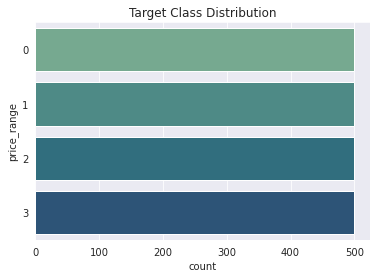

In [10]:
cp=sns.countplot(data=mbdata, palette='crest',y='price_range')
cp.set_title('Target Class Distribution')
sns.set_theme(style="darkgrid")

Let us look at the price range against the numerical variables to understand any insights about price. The decrease in count in phones with 3G is notoriuous due to innovation. Most phones nowadays have 4G and some have 5G (not included).

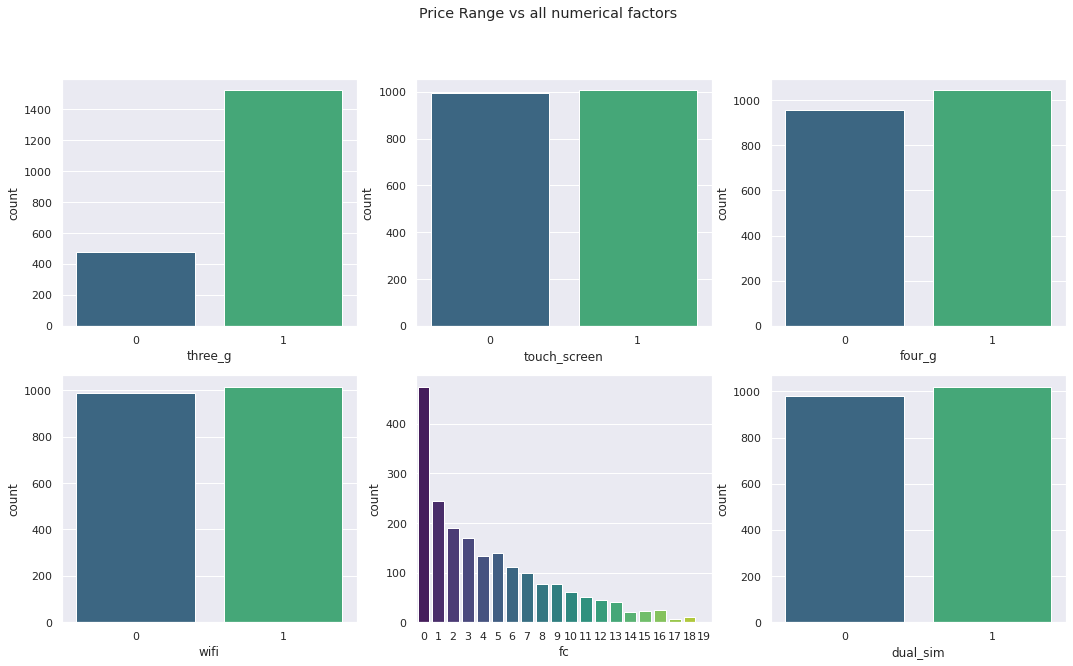

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Price Range vs all numerical factors')
sns.countplot(ax=axes[0, 0], data=mbdata, x='three_g',palette='viridis')
sns.countplot(ax=axes[0, 1], data=mbdata, x='touch_screen',palette='viridis')
sns.countplot(ax=axes[0, 2], data=mbdata, x='four_g',palette='viridis')
sns.countplot(ax=axes[1, 0], data=mbdata, x='wifi',palette='viridis')
sns.countplot(ax=axes[1,1], data=mbdata, x ='fc' ,palette='viridis')
sns.countplot(ax=axes[1,2], data=mbdata, x ='dual_sim',palette='viridis' )
sns.set_theme(style="darkgrid")
plt.show()

We can do a correlation between all the features in the dataset

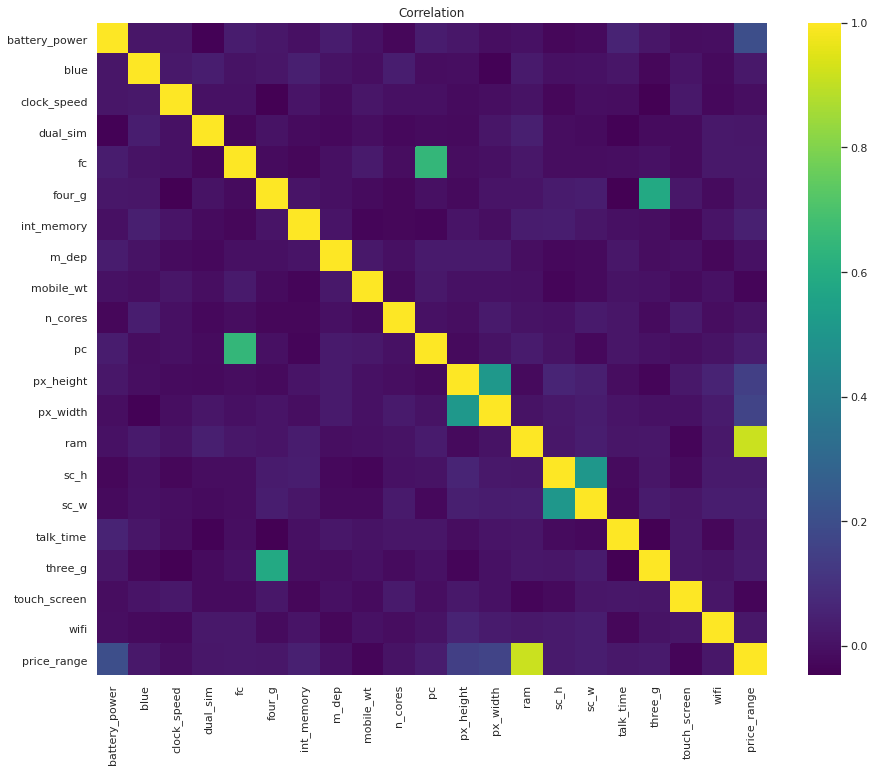

In [12]:
corr= mbdata.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='viridis')
r.set_title("Correlation")
sns.set_theme(style="darkgrid")

As we can see, the price range has a strong positive correlation with the ram, . We can dig deeper into this feature. 

Other variables with strong positive correlation are: 3G and 4G, camera mega pixels, Pixel Resolutions and Screen height and width.
 
For example as long as screen width increase, screen height also increases, which makes sense.

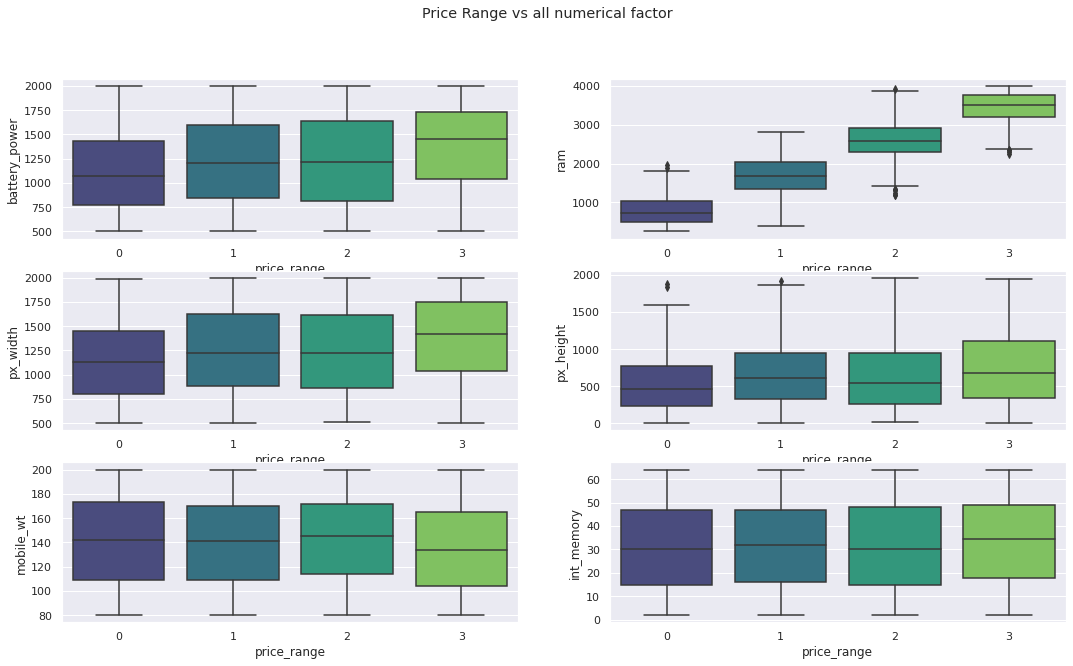

In [13]:
fig, axes = plt.subplots(3, 2, figsize=(18, 10))

fig.suptitle('Price Range vs all numerical factor')

sns.boxplot(ax=axes[0, 0], data=mbdata, x='price_range', y='battery_power',palette = "viridis")
sns.boxplot(ax=axes[0, 1], data=mbdata, x='price_range', y='ram',palette = "viridis")
sns.boxplot(ax=axes[1, 0], data=mbdata, x='price_range', y='px_width',palette = "viridis")
sns.boxplot(ax=axes[1, 1], data=mbdata, x='price_range', y='px_height',palette = "viridis")
sns.boxplot(ax=axes[2,0],data=mbdata,x='price_range',y='mobile_wt',palette = "viridis")
sns.boxplot(ax=axes[2,1],data=mbdata,x='price_range',y='int_memory',palette = "viridis")
plt.show()

We can visualize and analyze the relationship between two variables and describe their individual distributions on the same plot with the sns joinplot graph. The price distribution makes sense as we are dealing with ranges. However the Ram shows small tails with the majority of the selection between 1000 and 3000

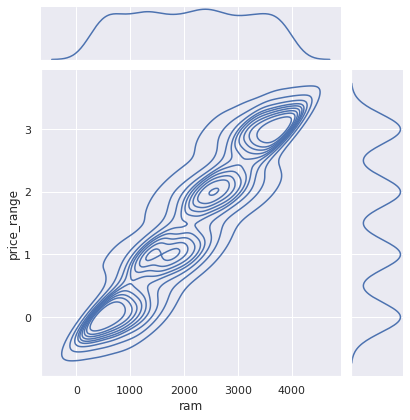

In [14]:
sns.jointplot(x='ram',y='price_range',data=mbdata,palette='viridis',kind='kde')
sns.set_theme(style="darkgrid")

Most phones will be supported by 3G due to being earlier technology adopted. We can expect a lower count of mobile phones with 4G in the dataset.

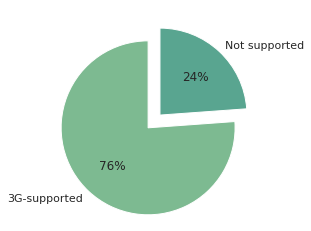

In [15]:
labels4g = ["3G-supported",'Not supported']
values4g = mbdata['three_g'].value_counts().values
colors = sns.color_palette("crest")
sns.set_theme(style="darkgrid")
plt.pie(values4g, labels = labels4g, colors = colors, autopct='%.0f%%',explode = [0.2,0],startangle=90)
plt.show()


In analysing important features, the primary and front camera of the device seems to be relatively important to the price. We will see this assumption later in the correlation analysis. 

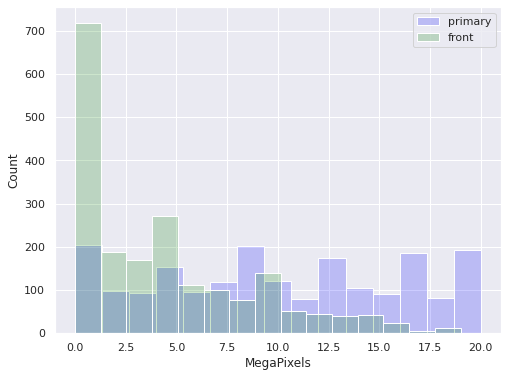

In [16]:
plt.figure(figsize=(8,6))
sns.histplot(data=mbdata, x=mbdata['pc'], alpha=0.2, color='blue', bins=15, label='primary')
sns.histplot(data=mbdata, x=mbdata['fc'], alpha=0.2, color='green',bins=15, label='front')
plt.xlabel('MegaPixels')
plt.legend()
plt.show()

In [17]:
fig2 = px.scatter(mbdata,x="ram",color="price_range",facet_col="three_g")
fig2.show()

In [18]:
fig = px.histogram(mbdata,x = 'battery_power',
                   marginal = 'violin',
                  color_discrete_sequence = ['firebrick'])
fig.update_layout(
xaxis_title_text = 'Battery Power',
yaxis_title_text = 'Frequency',
bargap = 0.2, showlegend = False,
             autosize=False,
             width=700,
             height=450)

fig.show()

***
<a id="6"></a> <br>
# 4. Feature Selection 

The first step is to drop the predicted variable, in this case is the price range

In [19]:
x = mbdata.drop('price_range',axis=1) # x variable stores the independent variables.
y = mbdata['price_range'] #y store the dependent variable

<a id="7"></a> <br>
## 4.1. Splitting the data 

from sklearn.model_selection import train_test_split

In [20]:
# separate train and test sets
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(
    mbdata.drop(labels=['price_range'], axis=1),
    mbdata['price_range'],
    test_size=0.2,
    random_state= random_state)

X_train.shape, X_test.shape

((1600, 20), (400, 20))

***
<a id="8"></a> <br>
## 4.2. Determine Mutual Information

The mutual information measures the reduction in uncertainty in variable A when variable B is known

To select variables, we are interested in the mutual information between the predictor variables and the target. Higher mutual information values, indicate little uncertainty about the target Y given the predictor X.

In [21]:
from sklearn.feature_selection import mutual_info_classif

Calculate the mutual information between the variables and the target. The smaller the value of the mi, the less information we can infer fromthe feature about the target.

In [22]:
mi = mutual_info_classif(X_train, y_train)
mi

array([0.0292034 , 0.        , 0.        , 0.        , 0.        ,
       0.00469978, 0.00714138, 0.02073006, 0.00264992, 0.0017777 ,
       0.01480125, 0.03010211, 0.03596387, 0.84294734, 0.        ,
       0.        , 0.        , 0.00337303, 0.00434242, 0.        ])

We can capture the above array in a pandas series. Then we add the variable names in the index, sort the features based on their mutual information value and make a bar plot

Text(0, 0.5, 'Mutual Information')

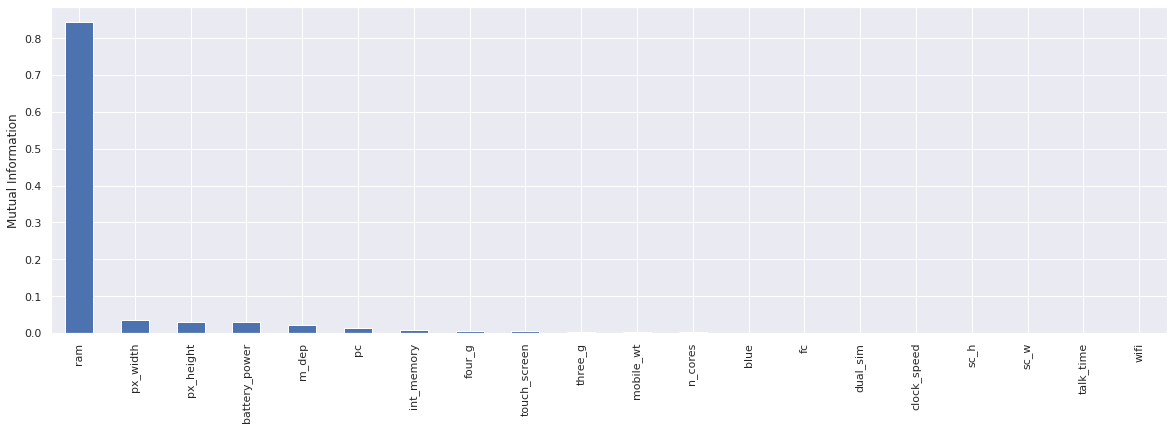

In [23]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

There are a few features (left of the plot) with higher mutual information values. There are also features with almost zero MI values on the right of the plot.
Now that we have found the miv's we can fin the best features that can help us predict the price ranges.

We will select the top k features. as Scikit-learn transformer will help us do this process automatically based on statistical differenciators, including MI. 


## 4.3 Select top k features

In [24]:
from sklearn.feature_selection import SelectKBest

In [25]:
sel_ = SelectKBest(mutual_info_classif, k=8).fit(X_train, y_train)

X_train.columns[sel_.get_support()]

Index(['battery_power', 'dual_sim', 'px_height', 'px_width', 'ram', 'sc_w',
       'touch_screen', 'wifi'],
      dtype='object')

In [26]:
X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

In [27]:
print(X_train.shape)
print(X_test.shape)

(1600, 8)
(400, 8)


***
<a id="9"></a> <br>
# 5. Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
X_train

array([[ 1.54835969,  0.97043679,  0.27571162, ...,  0.75950883,
         0.9900495 ,  1.00250313],
       [-1.3795348 , -1.03046381, -0.25876229, ..., -1.08486853,
         0.9900495 ,  1.00250313],
       [-0.01091435,  0.97043679, -0.28571055, ...,  1.45115034,
        -1.0100505 ,  1.00250313],
       ...,
       [ 1.33500924, -1.03046381,  0.19037545, ...,  1.22060317,
        -1.0100505 ,  1.00250313],
       [ 1.55743843,  0.97043679, -0.34409846, ...,  1.22060317,
         0.9900495 ,  1.00250313],
       [-1.37499543,  0.97043679, -1.01331368, ...,  1.45115034,
        -1.0100505 , -0.99750312]])

***
<a id="10"></a> <br>
# 6. Logistic Regression

In [30]:
classifier = LogisticRegression(random_state = random_state)

classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       105
           1       0.95      0.99      0.97        91
           2       0.96      0.95      0.95        92
           3       0.97      0.96      0.97       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[102   3   0   0]
 [  1  90   0   0]
 [  0   2  87   3]
 [  0   0   4 108]]



<a id="11"></a> <br>
# 7. Dimensionality Reduction (LDA)

In [32]:
lda = LDA(n_components = 3)

X_train_lda = lda.fit_transform(X_train,y_train)
X_test_lda = lda.transform(X_test)

classifier_lda = LogisticRegression(random_state = random_state)
classifier_lda.fit(X_train_lda, y_train)

y_pred_lda = classifier_lda.predict(X_test_lda)

print(classification_report(y_test, y_pred_lda))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       105
           1       0.95      1.00      0.97        91
           2       0.95      0.93      0.94        92
           3       0.97      0.96      0.96       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_lda)
print(cm)
acc2 = accuracy_score(y_test, y_pred_lda)

[[103   2   0   0]
 [  0  91   0   0]
 [  0   3  86   3]
 [  0   0   5 107]]


***
<a id="12"></a> <br>
# 8. Support Vector Machine 

In [34]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = random_state)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       105
           1       0.94      0.99      0.96        91
           2       0.96      0.93      0.95        92
           3       0.96      0.96      0.96       112

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



<a id="13"></a> <br>
# 9. Decision Tree Model

In [35]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = random_state)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       105
           1       0.76      0.89      0.82        91
           2       0.81      0.82      0.81        92
           3       0.95      0.88      0.92       112

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



<a id="14"></a> <br>
# 10. Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=500, max_depth=11, random_state = random_state)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       105
           1       0.90      0.91      0.91        91
           2       0.85      0.89      0.87        92
           3       0.95      0.91      0.93       112

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



<a id="15"></a> <br>
# 11. Gradient Boosting 

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       105
           1       0.88      0.91      0.90        91
           2       0.82      0.87      0.84        92
           3       0.94      0.88      0.91       112

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



<a id="16"></a> <br>
# 12. FineTuning Hyperparameters with Grid Search 

---------------------------------------------------------------------------
Fitting 10 folds for each of 250 candidates, totalling 2500 fits
Model: DecisionTreeClassifier(random_state=42)
Accuracy: %84.81
MSE: 0.1525
ROC AUC: 0.9335269677283191
Recall: 0.8475
Precision: 0.8486060338050315
F1-Score: 0.8477285009834188
Best Estimator: DecisionTreeClassifier(max_depth=13, min_samples_split=10, random_state=42)
---------------------------------------------------------------------------
Fitting 10 folds for each of 32 candidates, totalling 320 fits
Model: SVC(probability=True, random_state=42)
Accuracy: %95.31
MSE: 0.045
ROC AUC: 0.998953702088951
Recall: 0.955
Precision: 0.9555644033967963
F1-Score: 0.9550996992785211
Best Estimator: SVC(C=300, gamma=0.001, probability=True, random_state=42)
---------------------------------------------------------------------------
Fitting 10 folds for each of 54 candidates, totalling 540 fits
Model: RandomForestClassifier(random_state=42)
Accuracy: %90.4

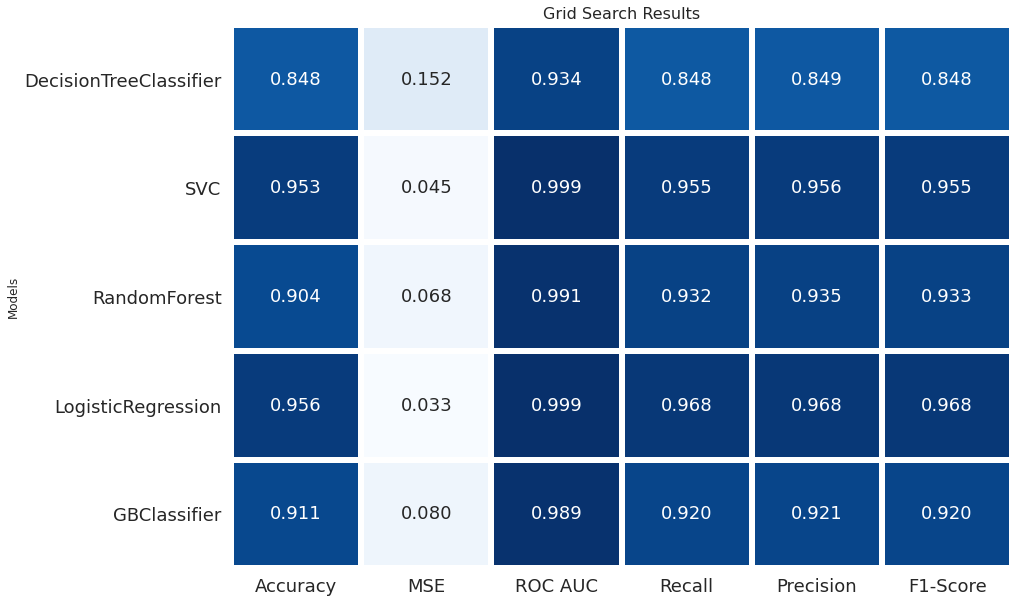

In [38]:
#code referenced from: https://www.kaggle.com/prateekmaj21/mobile-price-prediction
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state, probability = True),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             GradientBoostingClassifier(random_state = random_state)]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [0.1, 1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-4, 4, 20),
                    "penalty": ["l1","l2","none"]}



gbc_param_grid = {
    "learning_rate": [0.05, 0.1, 0.2],
    "min_samples_split": [2,3,10],
    "min_samples_leaf": [1,3,10]
    }


classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   gbc_param_grid]

cv_result = []
best_estimators = []
mean_squared_errors = []
roc_auc_scores = []
recall_scores = []
precision_scores = []
f1_scores = []


for i in range(len(classifier)):
    print("---------------------------------------------------------------------------")
    clf = GridSearchCV(classifier[i],
                       param_grid=classifier_param[i],
                       cv = StratifiedKFold(n_splits = 10),
                       scoring = "accuracy",
                       n_jobs = -1,verbose = 2)
    
    clf.fit(X_train,y_train)
    
    cv_result.append(clf.best_score_)
    
    mean_squared_errors.append(mean_squared_error(y_test,clf.predict(X_test)))
    
    roc_auc_scores.append(roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr'))
    
    recall_scores.append(recall_score(y_test, clf.predict(X_test), average='weighted'))
    
    precision_scores.append(precision_score(y_test, clf.predict(X_test), average='weighted'))
    
    f1_scores.append(f1_score(y_test, clf.predict(X_test), average='weighted'))
    
    best_estimators.append(clf.best_estimator_)
    
    print("Model: {}".format(classifier[i]))
    print("Accuracy: %{}".format(round(cv_result[i]*100,2)))
    print("MSE: {}".format(mean_squared_errors[i]))
    print("ROC AUC: {}".format(roc_auc_scores[i]))
    print("Recall: {}".format(recall_scores[i]))
    print("Precision: {}".format(precision_scores[i]))
    print("F1-Score: {}".format(f1_scores[i]))
    print("Best Estimator: {}".format(clf.best_estimator_))
    
print("---------------------------------------------------------------------------")

sns.set_style("darkgrid")
cv_results = pd.DataFrame({"Accuracy":cv_result,
                           "MSE":mean_squared_errors,
                           "ROC AUC":roc_auc_scores,
                           "Recall": recall_scores,
                           "Precision": precision_scores,
                           "F1-Score":f1_scores,
                           "Models":["DecisionTreeClassifier", 
                                     "SVC",
                                     "RandomForest",
                                     "LogisticRegression",
                                     "GBClassifier"]})

cv_results.index = cv_results["Models"]

cv_results  = cv_results.drop(["Models"], axis = 1)

f,ax = plt.subplots(figsize=(14,10))

sns.heatmap(cv_results, annot=True,cmap = "Blues",fmt= '.3f',
            ax=ax,linewidths = 5, cbar = False,
            annot_kws={"size": 18})

plt.xticks(size = 18)
plt.yticks(size = 18, rotation = 0)
plt.ylabel("Models")
plt.title("Grid Search Results", size = 16)
plt.show()

<a id="17"></a> <br>
# 13. Visualizing mean Accuracy scores from the models

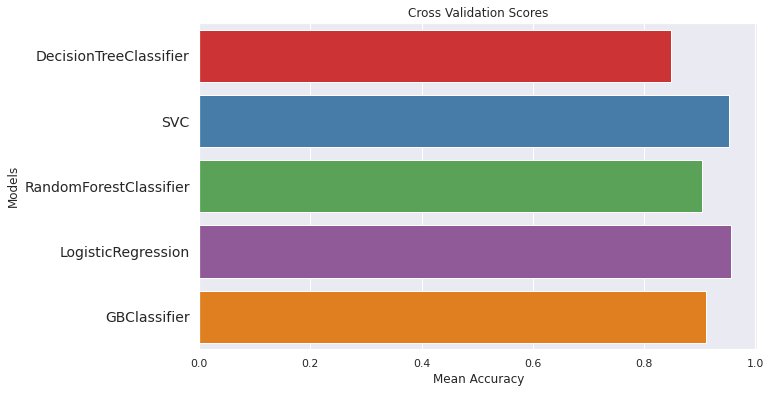

In [39]:
sns.set_style("darkgrid")
cv_results = pd.DataFrame({"Cross Validation Means":cv_result,
                           "Models":["DecisionTreeClassifier", "SVC",
                                     "RandomForestClassifier",
                                     "LogisticRegression",
                                     "GBClassifier"]})

plt.figure(figsize = (10,6))
sns.barplot("Cross Validation Means", "Models",
            data = cv_results, palette = "Set1")
plt.xlabel("Mean Accuracy",
           size = 12)
plt.yticks(size = 14)
plt.title("Cross Validation Scores",
          size = 12)
plt.show()

<a id="18"></a> <br>
# 14. Ensemble learning & matrix 

In [40]:
votingC = VotingClassifier(estimators = [("svc",best_estimators[1]),
                                        ("lr",best_estimators[3]),
                                        ("gbc",best_estimators[4])])

votingC = votingC.fit(X_train, y_train)

voting_pred = votingC.predict(X_test)

print(classification_report(y_test, voting_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       105
           1       0.94      0.99      0.96        91
           2       0.95      0.95      0.95        92
           3       0.97      0.96      0.96       112

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



In [41]:
cm = confusion_matrix(y_test, voting_pred)
print(cm)

[[101   4   0   0]
 [  1  90   0   0]
 [  0   2  87   3]
 [  0   0   5 107]]


<a id="19"></a> <br>
# 15. Best Estimator 

In [42]:
classifier = LogisticRegression(C=545.5594781168514, random_state=42)

classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       105
           1       0.94      0.99      0.96        91
           2       0.95      0.93      0.94        92
           3       0.97      0.96      0.96       112

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



<a id="20"></a> <br>
# 16. ROC Curve and AUC

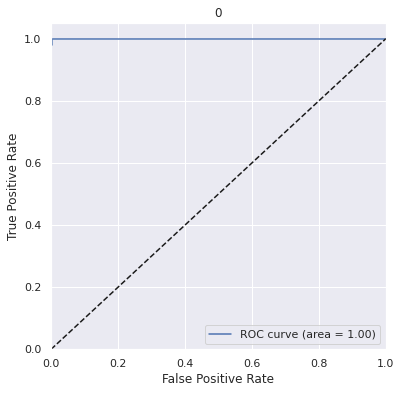

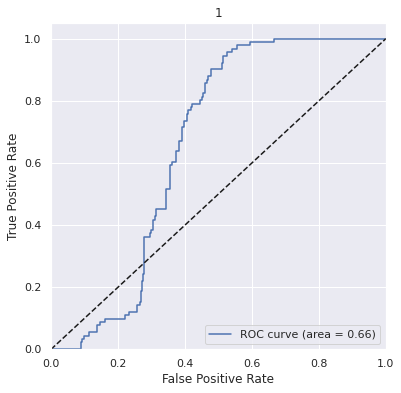

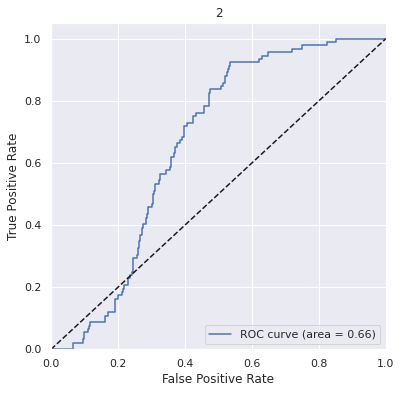

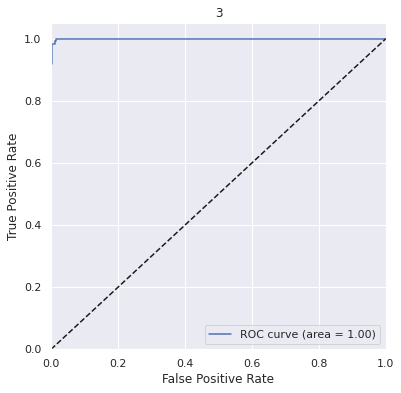

In [43]:
X = mbdata.iloc[:,0:20].values
y = mbdata.iloc[:, 20].values

y = label_binarize(y, classes=[0,1,2,3])
n_classes = 4

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

clf = OneVsRestClassifier(best_estimators[3])
y_score = clf.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i],
                                  y_score[:, i])
    roc_auc[i] = auc(fpr[i],
                     tpr[i])

for i in range(n_classes):
    plt.figure(figsize = (6,6))
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(i)
    plt.legend(loc="lower right")
    plt.show()

<a id="21"></a> <br>
# Approach & Findings

This report has offered several key insights into the prediction of mobile price ranges based on the mobile specific features by using classification models. 

The report contains multiple sections, with the most important being the data visualization and modelling sections. In the data visualization, we perform some cleaning of null values, however the data seemed to already be cleaned therefore not a lot had to be done. Moreover, we looked at specific features in the dataset, and tied some of the to understand how price ranges might be affected by it if they were individually measured. 

The report has found that there are several (8) features in the dataset that we can deem important when predicting the price range of the phone. This are 'battery_power', 'int_memory', 'pc', 'px_height', 'px_width', 'ram', 'three_g', 'wifi' and were used to run the classification models. These features were extracted using the KBest method.

Using these features, the following models were ran: Decision Tree, Logit Regression, SVC, Gradient Boosting and Random Forests. After fitting the models, we did validation with GridSearch and fine-tuned some parameters in order to generate more accurate results. In order to adjust with a voting classifier, we used the best three models being Logit, SVC and Gradient boosting. 

Lastly, we fitted ROC curves to the data to calculate the area under the curve called the AUC which stands for the probability of the ocurrance of the indivual range in any instance. Namely the ranges 0 and 3 are the ones with the highest area under the ROC curve, while 1 and 2 have 0.66 score.

<a id="22"></a> <br>
# References 


Analytics Magazine. 2022. 7 Types of Classification Algorithms. [online] Available at: <https://analyticsindiamag.com/7-types-classification-algorithms/> [Accessed 3 March 2022].

Analytics Vidhya. 2022. Gradient Boosting | Hyperparameter Tuning Python. [online] Available at: <https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/> [Accessed 3 March 2022].

Displayr. 2022. What is a ROC Curve and How to Interpret It. [online] Available at: <https://www.displayr.com/what-is-a-roc-curve-how-to-interpret-it/#:~:text=A%20Receiver%20Operator%20Characteristic%20(ROC,natural%20hazards%20and%20machine%20learning.> [Accessed 3 March 2022].

Kaggle.com. 2022. Mobile Price Classification. [online] Available at: <https://www.kaggle.com/iabhishekofficial/mobile-price-classification> [Accessed 11 January 2022].

Knowledgehut.com. 2022. What is Linear Discriminant Analysis(LDA)?. [online] Available at: <https://www.knowledgehut.com/blog/data-science/linear-discriminant-analysis-for-machine-learning> [Accessed 6 February 2022].

Medium. 2022. Machine Learning with Python: Classification (complete tutorial). [online] Available at: <https://towardsdatascience.com/machine-learning-with-python-classification-complete-tutorial-d2c99dc524ec> [Accessed 14 January 2022].

Kaggle.com. 2022. Mobile Price Classification: EDA and ML. [online] Available at: <https://www.kaggle.com/barisscal/mobile-price-classification-eda-and-ml> [Accessed 3 March 2022].

